# Swish-based classifier with data augmentation and stochastic weght-averaging
- Swish activation, 4 layers, 100 neurons per layer
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Model uses a running average of previous weights and preiodically starts a new average alongside the nominal one and eventually compares it to the nominal to try and replace it.
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.850s 


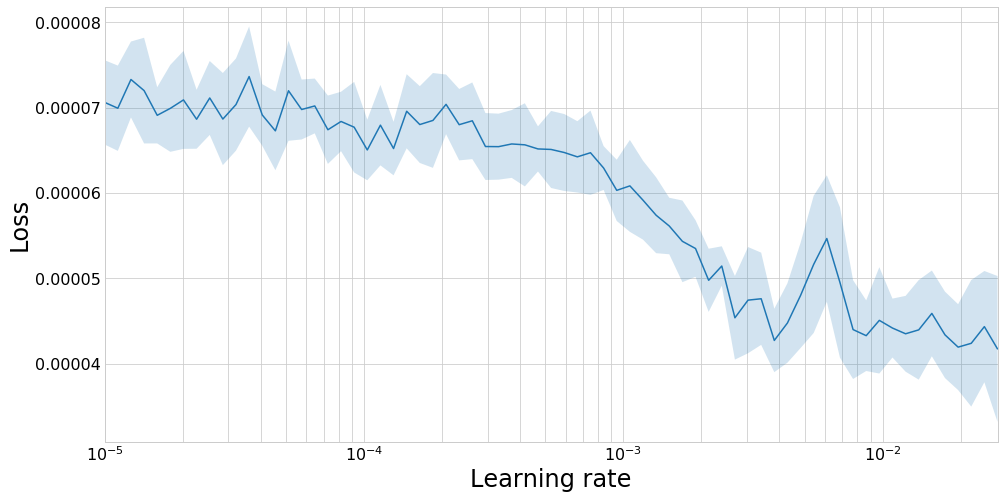

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.759787237380161e-05
2 New best found: 3.64847336605018e-05
3 New best found: 3.555644724847206e-05
5 New best found: 3.4832784525469214e-05
6 New best found: 3.464110869422631e-05
7 New best found: 3.463840795655797e-05
8 New best found: 3.4438082788155323e-05
11 New best found: 3.439297536788418e-05
12 New best found: 3.395266567466066e-05
16 New best found: 3.3744832278544084e-05
17 New best found: 3.363187939599795e-05
18 New best found: 3.33299512876244e-05
24 New best found: 3.329560181209803e-05
25 New best found: 3.317273723434645e-05
26 New best found: 3.313607466283983e-05
27 New best found: 3.309959427024938e-05
33 New best found: 3.302738135944719e-05
34 New best found: 3.2977238215861106e-05
35 New best found: 3.288962890252958e-05
36 New best found: 3.28232571222287e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.3452146212795924e-05, default loss 3.345214621279592

model is 37 epochs old
new model is 12 epochs old
97 swa loss 3.2163016293643806e-05, default loss 3.265751287775869e-05
model is 38 epochs old
new model is 13 epochs old
98 swa loss 3.215905235393948e-05, default loss 3.2420596534809476e-05
98 New best found: 3.215905235393948e-05
model is 39 epochs old
new model is 14 epochs old
99 swa loss 3.216078377586443e-05, default loss 3.352197031443155e-05
model is 40 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2155844832072016e-05, new model: 3.217703626777915e-05
Current model better, renewing
____________________


100 swa loss 3.2155844832072016e-05, default loss 3.270473205653447e-05
100 New best found: 3.2155844832072016e-05
model is 41 epochs old
new model is 1 epochs old
101 swa loss 3.215086983314483e-05, default loss 3.282910945116533e-05
101 New best found: 3.215086983314483e-05
model is 42 epochs old
new model is 2 epochs old
102 swa loss 3.21493780229138e-05, default loss 3.255973744844169e-

150 swa loss 3.200183122053124e-05, default loss 3.259227752085072e-05
model is 51 epochs old
new model is 1 epochs old
151 swa loss 3.2001950115391786e-05, default loss 3.273662189871453e-05
model is 52 epochs old
new model is 2 epochs old
152 swa loss 3.199895321910711e-05, default loss 3.243133257902724e-05
model is 53 epochs old
new model is 3 epochs old
153 swa loss 3.1997506503932626e-05, default loss 3.247007383767744e-05
model is 54 epochs old
new model is 4 epochs old
154 swa loss 3.1999190118660896e-05, default loss 3.2782391295798564e-05
model is 55 epochs old
new model is 5 epochs old
155 swa loss 3.200027728365044e-05, default loss 3.304929299818058e-05
model is 56 epochs old
new model is 6 epochs old
156 swa loss 3.200274997485109e-05, default loss 3.253197478268456e-05
model is 57 epochs old
new model is 7 epochs old
157 swa loss 3.2005460267117004e-05, default loss 3.2868458681252334e-05
model is 58 epochs old
new model is 8 epochs old
158 swa loss 3.2008408437694496e-0

Checking renewal swa model, current model: 3.240251786656752e-05, new model: 3.344758355166682e-05
Current model better, renewing
____________________


60 swa loss 3.240251786656752e-05, default loss 3.304437285939609e-05
60 New best found: 3.240251786656752e-05
model is 11 epochs old
new model is 1 epochs old
61 swa loss 3.2391036507637485e-05, default loss 3.28802622165935e-05
61 New best found: 3.2391036507637485e-05
model is 12 epochs old
new model is 2 epochs old
62 swa loss 3.238822658558222e-05, default loss 3.2880031018401976e-05
62 New best found: 3.238822658558222e-05
model is 13 epochs old
new model is 3 epochs old
63 swa loss 3.235924441137586e-05, default loss 3.281180133825048e-05
63 New best found: 3.235924441137586e-05
model is 14 epochs old
new model is 4 epochs old
64 swa loss 3.234147795509689e-05, default loss 3.266019737262574e-05
64 New best found: 3.234147795509689e-05
model is 15 epochs old
new model is 5 epochs old
65 swa loss 3.233757071287128e-05, default lo

109 swa loss 3.213097961061323e-05, default loss 3.2552174619706704e-05
109 New best found: 3.213097961061323e-05
model is 25 epochs old
new model is 5 epochs old
110 swa loss 3.212834562629735e-05, default loss 3.271722056876143e-05
110 New best found: 3.212834562629735e-05
model is 26 epochs old
new model is 6 epochs old
111 swa loss 3.2127272642536503e-05, default loss 3.2729964046783556e-05
111 New best found: 3.2127272642536503e-05
model is 27 epochs old
new model is 7 epochs old
112 swa loss 3.212143033298267e-05, default loss 3.27276877188818e-05
112 New best found: 3.212143033298267e-05
model is 28 epochs old
new model is 8 epochs old
113 swa loss 3.211651868677212e-05, default loss 3.278017544972953e-05
113 New best found: 3.211651868677212e-05
model is 29 epochs old
new model is 9 epochs old
114 swa loss 3.2110654035492413e-05, default loss 3.2437860373359025e-05
114 New best found: 3.2110654035492413e-05
model is 30 epochs old
new model is 10 epochs old
Checking renewal swa 

162 swa loss 3.199707768028921e-05, default loss 3.265622469871116e-05
model is 58 epochs old
new model is 18 epochs old
163 swa loss 3.199822129680529e-05, default loss 3.264200970479126e-05
model is 59 epochs old
new model is 19 epochs old
164 swa loss 3.200031967135107e-05, default loss 3.281595884988402e-05
model is 60 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.2001703321840364e-05, new model: 3.212937886787434e-05
Current model better, renewing
____________________


165 swa loss 3.2001703321840364e-05, default loss 3.297169333214129e-05
model is 61 epochs old
new model is 1 epochs old
166 swa loss 3.2005545122316206e-05, default loss 3.297048039026152e-05
model is 62 epochs old
new model is 2 epochs old
167 swa loss 3.2005854568776944e-05, default loss 3.2653656294619704e-05
model is 63 epochs old
new model is 3 epochs old
168 swa loss 3.2003915661637535e-05, default loss 3.240935906571774e-05
model is 64 epochs old
new model is 4 epochs ol

70 swa loss 3.2351319493706924e-05, default loss 3.305581575873283e-05
model is 21 epochs old
new model is 1 epochs old
71 swa loss 3.233986856141546e-05, default loss 3.297245525928002e-05
71 New best found: 3.233986856141546e-05
model is 22 epochs old
new model is 2 epochs old
72 swa loss 3.233721479383061e-05, default loss 3.2884305664878756e-05
72 New best found: 3.233721479383061e-05
model is 23 epochs old
new model is 3 epochs old
73 swa loss 3.2327243465959e-05, default loss 3.3226630701722304e-05
73 New best found: 3.2327243465959e-05
model is 24 epochs old
new model is 4 epochs old
74 swa loss 3.2327147980269745e-05, default loss 3.320770648626346e-05
74 New best found: 3.2327147980269745e-05
model is 25 epochs old
new model is 5 epochs old
75 swa loss 3.2325800821925286e-05, default loss 3.321833201319788e-05
75 New best found: 3.2325800821925286e-05
model is 26 epochs old
new model is 6 epochs old
76 swa loss 3.232676884807464e-05, default loss 3.324468314727109e-05
model is

model is 30 epochs old
new model is 5 epochs old
120 swa loss 3.214513394366986e-05, default loss 3.3377403917178895e-05
120 New best found: 3.214513394366986e-05
model is 31 epochs old
new model is 6 epochs old
121 swa loss 3.2143227029485015e-05, default loss 3.256882582033688e-05
121 New best found: 3.2143227029485015e-05
model is 32 epochs old
new model is 7 epochs old
122 swa loss 3.213852683471922e-05, default loss 3.2767014061782635e-05
122 New best found: 3.213852683471922e-05
model is 33 epochs old
new model is 8 epochs old
123 swa loss 3.213549525067356e-05, default loss 3.267800702145939e-05
123 New best found: 3.213549525067356e-05
model is 34 epochs old
new model is 9 epochs old
124 swa loss 3.213276434602933e-05, default loss 3.275324232750852e-05
124 New best found: 3.213276434602933e-05
model is 35 epochs old
new model is 10 epochs old
125 swa loss 3.2130659867004536e-05, default loss 3.274448017185105e-05
125 New best found: 3.2130659867004536e-05
model is 36 epochs ol

model is 58 epochs old
new model is 13 epochs old
173 swa loss 3.2025353158238384e-05, default loss 3.263477544890147e-05
173 New best found: 3.2025353158238384e-05
model is 59 epochs old
new model is 14 epochs old
174 swa loss 3.2025582647562724e-05, default loss 3.270157980381369e-05
model is 60 epochs old
new model is 15 epochs old
175 swa loss 3.2025942038948766e-05, default loss 3.263783695757256e-05
model is 61 epochs old
new model is 16 epochs old
176 swa loss 3.202500461851707e-05, default loss 3.254445306641839e-05
176 New best found: 3.202500461851707e-05
model is 62 epochs old
new model is 17 epochs old
177 swa loss 3.2024894871399194e-05, default loss 3.265305645587065e-05
177 New best found: 3.2024894871399194e-05
model is 63 epochs old
new model is 18 epochs old
178 swa loss 3.2022783237183125e-05, default loss 3.309622609541282e-05
178 New best found: 3.2022783237183125e-05
model is 64 epochs old
new model is 19 epochs old
179 swa loss 3.2020174666377256e-05, default los

Checking renewal swa model, current model: 3.2040429341504025e-05, new model: 3.219331493289506e-05
Current model better, renewing
____________________


235 swa loss 3.2040429341504025e-05, default loss 3.270130505200976e-05
model is 121 epochs old
new model is 1 epochs old
236 swa loss 3.2041721338427555e-05, default loss 3.288790176586509e-05
model is 122 epochs old
new model is 2 epochs old
237 swa loss 3.204227628436149e-05, default loss 3.271185785165703e-05
model is 123 epochs old
new model is 3 epochs old
238 swa loss 3.204396678962279e-05, default loss 3.2820766539665876e-05
model is 124 epochs old
new model is 4 epochs old
239 swa loss 3.204328502046805e-05, default loss 3.2641240251890534e-05
model is 125 epochs old
new model is 5 epochs old
240 swa loss 3.204284440313321e-05, default loss 3.2777701644288204e-05
model is 126 epochs old
new model is 6 epochs old
241 swa loss 3.204303503612271e-05, default loss 3.265720900128758e-05
model is 127 epochs old
new model is 7 epoch

model is 29 epochs old
new model is 4 epochs old
89 swa loss 3.132590316672576e-05, default loss 3.17246609054564e-05
89 New best found: 3.132590316672576e-05
model is 30 epochs old
new model is 5 epochs old
90 swa loss 3.132457838873961e-05, default loss 3.1780539260944354e-05
90 New best found: 3.132457838873961e-05
model is 31 epochs old
new model is 6 epochs old
91 swa loss 3.132594076014357e-05, default loss 3.1946408082148994e-05
model is 32 epochs old
new model is 7 epochs old
92 swa loss 3.13285909651313e-05, default loss 3.1996594404336065e-05
model is 33 epochs old
new model is 8 epochs old
93 swa loss 3.1324249610042895e-05, default loss 3.170565235195681e-05
93 New best found: 3.1324249610042895e-05
model is 34 epochs old
new model is 9 epochs old
94 swa loss 3.132332816167036e-05, default loss 3.189289438305423e-05
94 New best found: 3.132332816167036e-05
model is 35 epochs old
new model is 10 epochs old
95 swa loss 3.131779196337448e-05, default loss 3.159328359106439e-05

model is 38 epochs old
new model is 13 epochs old
143 swa loss 3.1196283486497126e-05, default loss 3.165839689754648e-05
model is 39 epochs old
new model is 14 epochs old
144 swa loss 3.119947516606771e-05, default loss 3.218867380710435e-05
model is 40 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.120111447933596e-05, new model: 3.122997912578285e-05
Current model better, renewing
____________________


145 swa loss 3.120111447933596e-05, default loss 3.174563252541702e-05
model is 41 epochs old
new model is 1 epochs old
146 swa loss 3.1203438664670105e-05, default loss 3.215558258380042e-05
model is 42 epochs old
new model is 2 epochs old
147 swa loss 3.120283803800703e-05, default loss 3.1924296767101624e-05
model is 43 epochs old
new model is 3 epochs old
148 swa loss 3.119904698978644e-05, default loss 3.213393763435306e-05
model is 44 epochs old
new model is 4 epochs old
149 swa loss 3.1195300257240887e-05, default loss 3.173540304633207e-05


3 New best found: 3.548396810656413e-05
5 New best found: 3.50254311633762e-05
6 New best found: 3.48980496331933e-05
7 New best found: 3.429760008002631e-05
8 New best found: 3.407012043899158e-05
9 New best found: 3.389079170592595e-05
13 New best found: 3.3550021050905345e-05
17 New best found: 3.3546049868164116e-05
20 New best found: 3.338531975605292e-05
24 New best found: 3.335594838208635e-05
26 New best found: 3.3298708006623203e-05
27 New best found: 3.328954192693345e-05
28 New best found: 3.320766149190604e-05
29 New best found: 3.302836644143099e-05
33 New best found: 3.300168907444458e-05
44 New best found: 3.286175742250634e-05
47 New best found: 3.2803437655093146e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.2712000439642e-05, default loss 3.2712000439642e-05
50 New best found: 3.2712000439642e-05
model is 1 epochs old
51 swa loss 3.2656431563373186e-05, default loss 3.3202687303128187e-05
51 New best found: 3.2656431563373186e-05
model is 2 epochs old
52 swa l

95 swa loss 3.201460375203169e-05, default loss 3.2763683675875655e-05
model is 26 epochs old
new model is 6 epochs old
96 swa loss 3.200499322774704e-05, default loss 3.246390736094327e-05
96 New best found: 3.200499322774704e-05
model is 27 epochs old
new model is 7 epochs old
97 swa loss 3.2002412060683124e-05, default loss 3.265676507726312e-05
97 New best found: 3.2002412060683124e-05
model is 28 epochs old
new model is 8 epochs old
98 swa loss 3.199877227016259e-05, default loss 3.287939145666314e-05
98 New best found: 3.199877227016259e-05
model is 29 epochs old
new model is 9 epochs old
99 swa loss 3.2000092042289906e-05, default loss 3.2749754445103464e-05
model is 30 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.1989255757798676e-05, new model: 3.2048946458962746e-05
Current model better, renewing
____________________


100 swa loss 3.1989255757798676e-05, default loss 3.2626142143271866e-05
100 New best found: 3.1989255757798676e-05
model

145 swa loss 3.183681166992756e-05, default loss 3.233744474928244e-05
145 New best found: 3.183681166992756e-05
model is 46 epochs old
new model is 1 epochs old
146 swa loss 3.183569354659994e-05, default loss 3.260734979703557e-05
146 New best found: 3.183569354659994e-05
model is 47 epochs old
new model is 2 epochs old
147 swa loss 3.1835110462998275e-05, default loss 3.2340699655469505e-05
147 New best found: 3.1835110462998275e-05
model is 48 epochs old
new model is 3 epochs old
148 swa loss 3.18340374789841e-05, default loss 3.2474933384219186e-05
148 New best found: 3.18340374789841e-05
model is 49 epochs old
new model is 4 epochs old
149 swa loss 3.1831110779603475e-05, default loss 3.220420420329902e-05
149 New best found: 3.1831110779603475e-05
model is 50 epochs old
new model is 5 epochs old
150 swa loss 3.1830858020111915e-05, default loss 3.24899896462739e-05
150 New best found: 3.1830858020111915e-05
model is 51 epochs old
new model is 6 epochs old
151 swa loss 3.18289475

model is 102 epochs old
new model is 12 epochs old
202 swa loss 3.181403099079034e-05, default loss 3.2386932919325773e-05
202 New best found: 3.181403099079034e-05
model is 103 epochs old
new model is 13 epochs old
203 swa loss 3.1814195596962235e-05, default loss 3.2508439960656686e-05
model is 104 epochs old
new model is 14 epochs old
204 swa loss 3.181433910722262e-05, default loss 3.2600322930375115e-05
model is 105 epochs old
new model is 15 epochs old
205 swa loss 3.1813297764892924e-05, default loss 3.252261932793772e-05
205 New best found: 3.1813297764892924e-05
model is 106 epochs old
new model is 16 epochs old
206 swa loss 3.1812845031527106e-05, default loss 3.2578934763296273e-05
206 New best found: 3.1812845031527106e-05
model is 107 epochs old
new model is 17 epochs old
207 swa loss 3.181267196705448e-05, default loss 3.247920695066568e-05
207 New best found: 3.181267196705448e-05
model is 108 epochs old
new model is 18 epochs old
208 swa loss 3.1811084508808565e-05, def

1 New best found: 3.855690204945859e-05
2 New best found: 3.662963359965943e-05
3 New best found: 3.621922968159197e-05
4 New best found: 3.560805300512584e-05
5 New best found: 3.5422419421956876e-05
6 New best found: 3.517622340586968e-05
7 New best found: 3.498335682379547e-05
8 New best found: 3.4924351630616e-05
9 New best found: 3.428139057214139e-05
12 New best found: 3.423205423314357e-05
16 New best found: 3.405822891072603e-05
19 New best found: 3.3833745877200274e-05
23 New best found: 3.3596049583866264e-05
28 New best found: 3.353695697587682e-05
35 New best found: 3.3316880026541186e-05
40 New best found: 3.3285715474630704e-05
48 New best found: 3.3153327356558296e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.320704898360418e-05, default loss 3.320704898360418e-05
model is 1 epochs old
51 swa loss 3.2942430043476636e-05, default loss 3.3524620565003714e-05
51 New best found: 3.2942430043476636e-05
model is 2 epochs old
52 swa loss 3.2852311912574806e-05, default 

98 swa loss 3.255358565802453e-05, default loss 3.3106949771172365e-05
98 New best found: 3.255358565802453e-05
model is 49 epochs old
new model is 14 epochs old
99 swa loss 3.2550664119480646e-05, default loss 3.327489813382272e-05
99 New best found: 3.2550664119480646e-05
model is 50 epochs old
new model is 15 epochs old
100 swa loss 3.2547187076124826e-05, default loss 3.316135472414317e-05
100 New best found: 3.2547187076124826e-05
model is 51 epochs old
new model is 16 epochs old
101 swa loss 3.254508491227171e-05, default loss 3.310242202860536e-05
101 New best found: 3.254508491227171e-05
model is 52 epochs old
new model is 17 epochs old
102 swa loss 3.2542499493865765e-05, default loss 3.308201100444421e-05
102 New best found: 3.2542499493865765e-05
model is 53 epochs old
new model is 18 epochs old
103 swa loss 3.254301500564907e-05, default loss 3.3518294096575116e-05
model is 54 epochs old
new model is 19 epochs old
104 swa loss 3.254258693486918e-05, default loss 3.324078367

model is 68 epochs old
new model is 18 epochs old
153 swa loss 3.245510364649818e-05, default loss 3.313147855369607e-05
153 New best found: 3.245510364649818e-05
model is 69 epochs old
new model is 19 epochs old
154 swa loss 3.245319841662422e-05, default loss 3.293715804320527e-05
154 New best found: 3.245319841662422e-05
model is 70 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.2451883930480106e-05, new model: 3.24633555370383e-05
Current model better, renewing
____________________


155 swa loss 3.2451883930480106e-05, default loss 3.3074284991016614e-05
155 New best found: 3.2451883930480106e-05
model is 71 epochs old
new model is 1 epochs old
156 swa loss 3.244805016729515e-05, default loss 3.280131823266856e-05
156 New best found: 3.244805016729515e-05
model is 72 epochs old
new model is 2 epochs old
157 swa loss 3.2445964521321005e-05, default loss 3.284811239864211e-05
157 New best found: 3.2445964521321005e-05
model is 73 epochs old
new mo

model is 121 epochs old
new model is 26 epochs old
206 swa loss 3.240705822390737e-05, default loss 3.3303749282640636e-05
model is 122 epochs old
new model is 27 epochs old
207 swa loss 3.240726662916131e-05, default loss 3.309326447197236e-05
model is 123 epochs old
new model is 28 epochs old
208 swa loss 3.2405591472343074e-05, default loss 3.29225533947465e-05
208 New best found: 3.2405591472343074e-05
model is 124 epochs old
new model is 29 epochs old
209 swa loss 3.2405282123363576e-05, default loss 3.311424131970853e-05
209 New best found: 3.2405282123363576e-05
model is 125 epochs old
new model is 30 epochs old
Checking renewal swa model, current model: 3.240453500620788e-05, new model: 3.2456817472120746e-05
Current model better, renewing
____________________


210 swa loss 3.240453500620788e-05, default loss 3.309385968168499e-05
210 New best found: 3.240453500620788e-05
model is 126 epochs old
new model is 1 epochs old
211 swa loss 3.240470092277974e-05, default loss 3.33146

51 swa loss 3.149222315987572e-05, default loss 3.200855237955693e-05
51 New best found: 3.149222315987572e-05
model is 2 epochs old
52 swa loss 3.1236018709023484e-05, default loss 3.19177640871203e-05
52 New best found: 3.1236018709023484e-05
model is 3 epochs old
53 swa loss 3.1124625832308084e-05, default loss 3.157614136798657e-05
53 New best found: 3.1124625832308084e-05
model is 4 epochs old
54 swa loss 3.112722874066094e-05, default loss 3.167171278764727e-05
model is 5 epochs old
55 swa loss 3.10760790904169e-05, default loss 3.1614266804535875e-05
55 New best found: 3.10760790904169e-05
model is 6 epochs old
new model is 1 epochs old
56 swa loss 3.10712225822499e-05, default loss 3.1564368266845124e-05
56 New best found: 3.10712225822499e-05
model is 7 epochs old
new model is 2 epochs old
57 swa loss 3.1012840132461863e-05, default loss 3.120970045711147e-05
57 New best found: 3.1012840132461863e-05
model is 8 epochs old
new model is 3 epochs old
58 swa loss 3.099971998453838

100 swa loss 3.0748219510132914e-05, default loss 3.132799181184964e-05
100 New best found: 3.0748219510132914e-05
model is 16 epochs old
new model is 1 epochs old
101 swa loss 3.075261874764692e-05, default loss 3.1616499765368646e-05
model is 17 epochs old
new model is 2 epochs old
102 swa loss 3.073879312214558e-05, default loss 3.1095655386161526e-05
102 New best found: 3.073879312214558e-05
model is 18 epochs old
new model is 3 epochs old
103 swa loss 3.073592460204964e-05, default loss 3.131884450413054e-05
103 New best found: 3.073592460204964e-05
model is 19 epochs old
new model is 4 epochs old
104 swa loss 3.074122811231064e-05, default loss 3.176505211449694e-05
model is 20 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.0734319932525975e-05, new model: 3.085851542564342e-05
Current model better, renewing
____________________


105 swa loss 3.0734319932525975e-05, default loss 3.102247383940267e-05
105 New best found: 3.0734319932525975e-05
m

model is 48 epochs old
new model is 8 epochs old
153 swa loss 3.059350217808969e-05, default loss 3.141045031661633e-05
153 New best found: 3.059350217808969e-05
model is 49 epochs old
new model is 9 epochs old
154 swa loss 3.059078512378619e-05, default loss 3.1489361291460226e-05
154 New best found: 3.059078512378619e-05
model is 50 epochs old
new model is 10 epochs old
155 swa loss 3.058969808625989e-05, default loss 3.127950792986667e-05
155 New best found: 3.058969808625989e-05
model is 51 epochs old
new model is 11 epochs old
156 swa loss 3.058829701767536e-05, default loss 3.1276656592672224e-05
156 New best found: 3.058829701767536e-05
model is 52 epochs old
new model is 12 epochs old
157 swa loss 3.05860391978058e-05, default loss 3.095707912434591e-05
157 New best found: 3.05860391978058e-05
model is 53 epochs old
new model is 13 epochs old
158 swa loss 3.058262249542167e-05, default loss 3.103350123637938e-05
158 New best found: 3.058262249542167e-05
model is 54 epochs old
n

204 swa loss 3.051277268095873e-05, default loss 3.106674301088787e-05
model is 40 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.0513546666770707e-05, new model: 3.063511853470118e-05
Current model better, renewing
____________________


205 swa loss 3.0513546666770707e-05, default loss 3.100171347759897e-05
model is 41 epochs old
new model is 1 epochs old
206 swa loss 3.0516871326835825e-05, default loss 3.1307090144400716e-05
model is 42 epochs old
new model is 2 epochs old
207 swa loss 3.052466407461907e-05, default loss 3.1515733450942205e-05
model is 43 epochs old
new model is 3 epochs old
208 swa loss 3.052638068984379e-05, default loss 3.1674423572258094e-05
model is 44 epochs old
new model is 4 epochs old
209 swa loss 3.0528440199850593e-05, default loss 3.118515089154243e-05
model is 45 epochs old
new model is 5 epochs old
210 swa loss 3.053308812304749e-05, default loss 3.127706402665353e-05
model is 46 epochs old
new model is 6 epochs old

Checking renewal swa model, current model: 3.239178286157315e-05, new model: 3.3348538841902426e-05
Current model better, renewing
____________________


60 swa loss 3.239178286157315e-05, default loss 3.302619766265485e-05
model is 11 epochs old
new model is 1 epochs old
61 swa loss 3.239300580487639e-05, default loss 3.2959193474083204e-05
model is 12 epochs old
new model is 2 epochs old
62 swa loss 3.23959976537987e-05, default loss 3.29200630451444e-05
model is 13 epochs old
new model is 3 epochs old
63 swa loss 3.23915034111288e-05, default loss 3.31020846551829e-05
model is 14 epochs old
new model is 4 epochs old
64 swa loss 3.239686821895294e-05, default loss 3.366453878233346e-05
model is 15 epochs old
new model is 5 epochs old
65 swa loss 3.237458650798135e-05, default loss 3.28497636513068e-05
65 New best found: 3.237458650798135e-05
model is 16 epochs old
new model is 6 epochs old
66 swa loss 3.23649975845991e-05, default loss 3.2723204991515846e-05
66 New best found: 3.2364

model is 45 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.223494169129527e-05, new model: 3.227706649886049e-05
Current model better, renewing
____________________


115 swa loss 3.223494169129527e-05, default loss 3.290111850057466e-05
model is 46 epochs old
new model is 1 epochs old
116 swa loss 3.223854971248654e-05, default loss 3.291123255289114e-05
model is 47 epochs old
new model is 2 epochs old
117 swa loss 3.224004774162367e-05, default loss 3.3000751996021106e-05
model is 48 epochs old
new model is 3 epochs old
118 swa loss 3.224064804910163e-05, default loss 3.2715102687634906e-05
model is 49 epochs old
new model is 4 epochs old
119 swa loss 3.2235757968997726e-05, default loss 3.2899069161798546e-05
model is 50 epochs old
new model is 5 epochs old
120 swa loss 3.222983006221123e-05, default loss 3.269079148137075e-05
120 New best found: 3.222983006221123e-05
model is 51 epochs old
new model is 6 epochs old
121 swa loss 3.223036205339873e

model is 33 epochs old
new model is 3 epochs old
168 swa loss 3.214673632389273e-05, default loss 3.2687892353566454e-05
168 New best found: 3.214673632389273e-05
model is 34 epochs old
new model is 4 epochs old
169 swa loss 3.214156072129972e-05, default loss 3.2585043740186116e-05
169 New best found: 3.214156072129972e-05
model is 35 epochs old
new model is 5 epochs old
170 swa loss 3.214370594193692e-05, default loss 3.303917894142698e-05
model is 36 epochs old
new model is 6 epochs old
171 swa loss 3.2145796615766954e-05, default loss 3.343965574178205e-05
model is 37 epochs old
new model is 7 epochs old
172 swa loss 3.214299543920956e-05, default loss 3.257523493096342e-05
model is 38 epochs old
new model is 8 epochs old
173 swa loss 3.213735070406915e-05, default loss 3.3038196329745245e-05
173 New best found: 3.213735070406915e-05
model is 39 epochs old
new model is 9 epochs old
174 swa loss 3.2135582191144045e-05, default loss 3.255957073936876e-05
174 New best found: 3.2135582

2 New best found: 3.6745728278743336e-05
3 New best found: 3.657511354770727e-05
4 New best found: 3.592284205799595e-05
5 New best found: 3.575708827985814e-05
6 New best found: 3.5672925640416834e-05
7 New best found: 3.5213823356400044e-05
9 New best found: 3.481882012227242e-05
12 New best found: 3.4818191575982194e-05
14 New best found: 3.463820269110439e-05
16 New best found: 3.45265781462394e-05
17 New best found: 3.449157973650384e-05
18 New best found: 3.428515306243081e-05
20 New best found: 3.427247947446153e-05
22 New best found: 3.4241009175627156e-05
24 New best found: 3.376560137727816e-05
30 New best found: 3.3643297957555706e-05
39 New best found: 3.3622579699173685e-05
41 New best found: 3.360002124473122e-05
44 New best found: 3.355158542537108e-05
45 New best found: 3.342441428886387e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.371773507996216e-05, default loss 3.371773507996216e-05
model is 1 epochs old
51 swa loss 3.3212548686400114e-05, default loss 3.32

model is 36 epochs old
new model is 11 epochs old
96 swa loss 3.270854551110993e-05, default loss 3.3194517551329505e-05
96 New best found: 3.270854551110993e-05
model is 37 epochs old
new model is 12 epochs old
97 swa loss 3.269967755876225e-05, default loss 3.3318198730326935e-05
97 New best found: 3.269967755876225e-05
model is 38 epochs old
new model is 13 epochs old
98 swa loss 3.2698886009410795e-05, default loss 3.334295234016292e-05
98 New best found: 3.2698886009410795e-05
model is 39 epochs old
new model is 14 epochs old
99 swa loss 3.269727705830165e-05, default loss 3.3382599532358254e-05
99 New best found: 3.269727705830165e-05
model is 40 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.269280037012102e-05, new model: 3.269349685069483e-05
Current model better, renewing
____________________


100 swa loss 3.269280037012102e-05, default loss 3.328610619395493e-05
100 New best found: 3.269280037012102e-05
model is 41 epochs old
new model is

model is 45 epochs old
new model is 10 epochs old
145 swa loss 3.2558091703522504e-05, default loss 3.309461280930921e-05
145 New best found: 3.2558091703522504e-05
model is 46 epochs old
new model is 11 epochs old
146 swa loss 3.2558946955794726e-05, default loss 3.3230822782936704e-05
model is 47 epochs old
new model is 12 epochs old
147 swa loss 3.2556282570987786e-05, default loss 3.3233839003351926e-05
147 New best found: 3.2556282570987786e-05
model is 48 epochs old
new model is 13 epochs old
148 swa loss 3.255613271623938e-05, default loss 3.313005041871584e-05
148 New best found: 3.255613271623938e-05
model is 49 epochs old
new model is 14 epochs old
149 swa loss 3.255661495880796e-05, default loss 3.370599898834432e-05
model is 50 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.255468011526888e-05, new model: 3.255240443537281e-05
New model better, replacing
____________________


150 swa loss 3.255240443537281e-05, default loss 3.30040090175

4 New best found: 3.403337630120294e-05
5 New best found: 3.361452157320545e-05
6 New best found: 3.327215425263066e-05
8 New best found: 3.298289492533914e-05
12 New best found: 3.2950449462274454e-05
13 New best found: 3.283283135769355e-05
14 New best found: 3.277724811238959e-05
15 New best found: 3.227815886734778e-05
17 New best found: 3.215048239677498e-05
24 New best found: 3.1997737579719407e-05
25 New best found: 3.1778184068338886e-05
26 New best found: 3.17395359995722e-05
34 New best found: 3.1579755182066265e-05
44 New best found: 3.1563170981439886e-05
48 New best found: 3.147943922401567e-05
49 New best found: 3.136903962858122e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.208740315098428e-05, default loss 3.208740315098428e-05
model is 1 epochs old
51 swa loss 3.127593635270793e-05, default loss 3.163090541976572e-05
51 New best found: 3.127593635270793e-05
model is 2 epochs old
52 swa loss 3.120390528114006e-05, default loss 3.163592395850391e-05
52 New best f

model is 49 epochs old
new model is 14 epochs old
99 swa loss 3.086607368590746e-05, default loss 3.1669941061884334e-05
model is 50 epochs old
new model is 15 epochs old
100 swa loss 3.087177427954841e-05, default loss 3.178680904930659e-05
model is 51 epochs old
new model is 16 epochs old
101 swa loss 3.086936626965124e-05, default loss 3.178444449187287e-05
model is 52 epochs old
new model is 17 epochs old
102 swa loss 3.086915143680673e-05, default loss 3.147349976111191e-05
model is 53 epochs old
new model is 18 epochs old
103 swa loss 3.0867381863630636e-05, default loss 3.143177387659575e-05
model is 54 epochs old
new model is 19 epochs old
104 swa loss 3.0866040048564934e-05, default loss 3.1526862893967484e-05
model is 55 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.08617154072155e-05, new model: 3.0816810123044946e-05
New model better, replacing
____________________


105 swa loss 3.0816810123044946e-05, default loss 3.1416666368476314e-0

model is 67 epochs old
new model is 17 epochs old
152 swa loss 3.072895617554534e-05, default loss 3.115531143099294e-05
152 New best found: 3.072895617554534e-05
model is 68 epochs old
new model is 18 epochs old
153 swa loss 3.0730247584894825e-05, default loss 3.153645153038981e-05
model is 69 epochs old
new model is 19 epochs old
154 swa loss 3.073213327542738e-05, default loss 3.1248182175825115e-05
model is 70 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.073326127769789e-05, new model: 3.0748537088041546e-05
Current model better, renewing
____________________


155 swa loss 3.073326127769789e-05, default loss 3.157998814541183e-05
model is 71 epochs old
new model is 1 epochs old
156 swa loss 3.07366044601623e-05, default loss 3.176814131796946e-05
model is 72 epochs old
new model is 2 epochs old
157 swa loss 3.074002090026706e-05, default loss 3.184465620314667e-05
model is 73 epochs old
new model is 3 epochs old
158 swa loss 3.073915815774955

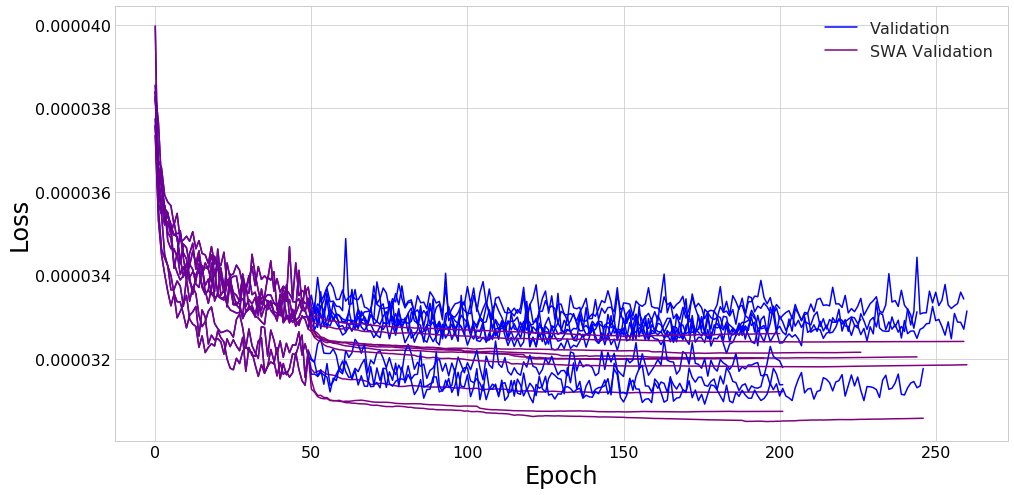

Mean loss = 3.17e-05 +- 2e-07
Mean wAUC = 0.0632 +- 0.0007
Mean AUC = 0.0986 +- 0.0009
Mean AMS = 3.93 +- 0.04
Mean cut = 0.957 +- 0.005
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=50, swaRenewal=5,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.0499180129845627e-05
Model 1 is 9 with loss = 3.072895617554534e-05
Model 2 is 3 with loss = 3.118564859905746e-05
Model 3 is 4 with loss = 3.180896000631037e-05
Model 4 is 1 with loss = 3.198702427509643e-05
Model 5 is 0 with loss = 3.1995480537261744e-05
Model 6 is 2 with loss = 3.201824618561854e-05
Model 7 is 7 with loss = 3.213354639241971e-05
Model 8 is 5 with loss = 3.240453500620788e-05
Model 9 is 8 with loss = 3.253775167560475e-05


## Response on validation data

In [16]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [17]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.008784302119600034s per sample

Predicting batch 2 out of 10
Prediction took 0.008951615358799972s per sample

Predicting batch 3 out of 10
Prediction took 0.008217752585799825s per sample

Predicting batch 4 out of 10
Prediction took 0.00871139161300016s per sample

Predicting batch 5 out of 10
Prediction took 0.009265362714799994s per sample

Predicting batch 6 out of 10
Prediction took 0.009948043071999927s per sample

Predicting batch 7 out of 10
Prediction took 0.009582336961200054s per sample

Predicting batch 8 out of 10
Prediction took 0.008216597469599947s per sample

Predicting batch 9 out of 10
Prediction took 0.008872242248800103s per sample

Predicting batch 10 out of 10
Prediction took 0.010964310011600174s per sample



In [18]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.902987350412334, weighted 0.9359183890279699


In [19]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.9161713691001108, 0.95892406)

In [20]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9597503930563107, corresponds to AMS of 3.9018222052284717
CPU times: user 2.31 s, sys: 8.12 s, total: 10.4 s
Wall time: 2min 52s


(4.0, 0.96)

# Test scoring

In [21]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [26]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.008382151117836342s per sample

Predicting batch 2 out of 10
Prediction took 0.008140396375854536s per sample

Predicting batch 3 out of 10
Prediction took 0.00829367294019999s per sample

Predicting batch 4 out of 10
Prediction took 0.009123130804509095s per sample

Predicting batch 5 out of 10
Prediction took 0.008589625954800001s per sample

Predicting batch 6 out of 10
Prediction took 0.008097615590381808s per sample

Predicting batch 7 out of 10
Prediction took 0.00871253520025457s per sample

Predicting batch 8 out of 10
Prediction took 0.009172197931290926s per sample

Predicting batch 9 out of 10
Prediction took 0.009501374546727278s per sample

Predicting batch 10 out of 10
Prediction took 0.009229642918890914s per sample

CPU times: user 1h 34min 8s, sys: 3min 28s, total: 1h 37min 36s
Wall time: 1h 19min 58s


In [27]:
scoreTestOD(testData.source, 0.9597503930563107)

Public:Private AMS: 3.6471231860839226 : 3.7668610720126376


(3.6471231860839226, 3.7668610720126376)

# Save/Load

In [24]:
name = "weights/Swish_SWA"

In [25]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)